## Part I: Data Pre-processing

### txt to csv

In [1]:
import pandas as pd

f = open('amazon-meta.txt',mode='r',encoding='utf-8')
fulltxt=f.readlines()
f.close()
s=pd.Series(fulltxt)[2:]
s=s.reset_index(drop=True)
print(len(s))
idxs=s[s=='\n'].index
len(idxs)

15010572


548553

In [2]:
import re

df=pd.DataFrame(columns=['Id','ASIN','DiscontinuedORNOT','title','group','salesrank','similar','similar_id','categories','reviews','reviews_total',
                        'reviews_downloaded','reviews_avgrating','cutomer_id'])

txt=[]
for i,idx in enumerate(idxs):
    if i<len(idxs)-1:
        b=s[(idxs[i]+1):idxs[i+1]].sum()
        txt.append(b)

In [3]:
s_txt=pd.Series(txt)
df=pd.DataFrame(s_txt)
df.columns=['fulltxt']

In [4]:
df['id']=df['fulltxt'].map(lambda b:re.findall('Id:   \d+',b)[0][6:])
df['ASIN']=df['fulltxt'].map(lambda b:re.findall('ASIN: .+\n',b)[0][6:-1])
df['DiscontinuedORNOT']=df['fulltxt'].map(lambda b:'discontinued' in b)

In [5]:
df_F=df[df.DiscontinuedORNOT==False]
df_T=df[df.DiscontinuedORNOT==True]

In [6]:
df_F['title']=df_F['fulltxt'].map(lambda b:re.findall('title: .+\n',b)[0][7:-1])
df_F['group']=df_F['fulltxt'].map(lambda b:re.findall('group: .+\n',b)[0][7:-1])
df_F['salesrank']=df_F['fulltxt'].map(lambda b:re.findall('salesrank: .+\n',b)[0][11:-1])
df_F['similar']=df_F['fulltxt'].map(lambda b:re.findall('similar: .+\n',b)[0][9:-1])
df_F['similar_id']=df_F['similar'].map(lambda b:re.findall('\d+',b))
df_F['categories']=df_F['fulltxt'].map(lambda b:re.findall('categories: .+\n',b)[0][12:-1])
df_F['cutomer_id']=df_F['fulltxt'].map(lambda b:[a[10:] for a in re.findall('cutomer: \w+',b)])

def review(s):
    if 'reviews' in s:
        try:
            reviews=re.findall('reviews: .+\n',s)[0]
        except:
            reviews=re.findall('reviews: .+',s)[0]
        return reviews
    else:
        return None

df_F['reviews']=df_F['fulltxt'].map(lambda s:review(s))
df_F['reviews_total']=df_F['reviews'].map(lambda s:re.findall('total: \d+',s)[0][7:])
df_F['reviews_downloaded']=df_F['reviews'].map(lambda s:re.findall('downloaded: \d+',s)[0][12:])
df_F['reviews_avgrating']=df_F['reviews'].map(lambda s:re.findall('avg rating: \d+',s)[0][12:])
df_F.to_csv('amazon.csv',index=False)

C:\Users\Liam\AppData\Local\Temp\ipykernel_24508\988079196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F['title']=df_F['fulltxt'].map(lambda b:re.findall('title: .+\n',b)[0][7:-1])
C:\Users\Liam\AppData\Local\Temp\ipykernel_24508\988079196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F['group']=df_F['fulltxt'].map(lambda b:re.findall('group: .+\n',b)[0][7:-1])
C:\Users\Liam\AppData\Local\Temp\ipykernel_24508\988079196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

### get one-to-one book_customer dataframe

In [7]:
import pandas as pd
import re

df = pd.read_csv('amazon.csv')
df = df[df['group']=='Book']
df_book = df[['ASIN','cutomer_id']]
df_book['len_cutomer_id']=df_book['cutomer_id'].map(lambda s:len(s))
df_book=df_book[df_book.len_cutomer_id>2]

C:\Users\Liam\AppData\Local\Temp\ipykernel_24508\4139850056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book['len_cutomer_id']=df_book['cutomer_id'].map(lambda s:len(s))


In [8]:
def to_list(s):
    temp=s.strip('[').rstrip(']').split(",")
    temp2=[b.strip(' ').strip('\'') for b in temp]
    return temp2

df_book['Customer_id']=df_book['cutomer_id'].map(lambda s:to_list(s))

In [9]:
df_book.shape

(252858, 4)

In [10]:
df_book.head()

,ASIN,cutomer_id,len_cutomer_id,Customer_id
0,0827229534,"['2JW67OY8U6HHK', '2VE83MZF98ITY']",34,"[2JW67OY8U6HHK, 2VE83MZF98ITY]"
1,0738700797,"['11NCO6YTE4BTJ', '13SG9ACZ9O5IM', '1BDAI6VEYM...",136,"[11NCO6YTE4BTJ, 13SG9ACZ9O5IM, 1BDAI6VEYMAZA, ..."
2,0486287785,['3IDGASRQAW8B2'],17,[3IDGASRQAW8B2]
3,0842328327,['2591BUPXCS705'],17,[2591BUPXCS705]
5,0486220125,"['2ESGJTTLJWIAK', '2CHULHAO3A9BY', '3BNWP7ATVP...",187,"[2ESGJTTLJWIAK, 2CHULHAO3A9BY, 3BNWP7ATVP045, ..."


In [11]:
df_sub=df_book.sample(n=10000, random_state=2)
df_sub=df_sub[['ASIN','Customer_id']]
df_sub['len_Customer_id']=df_sub['Customer_id'].map(lambda s:len(s))
df_sub['Book_id_l']=df_sub['ASIN'].map(lambda s:[s])
df_sub['book_id_customer']=df_sub['Book_id_l']*df_sub['len_Customer_id']
df_sub.head()

,ASIN,Customer_id,len_Customer_id,Book_id_l,book_id_customer
507252,0764550101,"[3QOHWZDID9ZM9, 2P84ZRRE2ZL7D, 19DJ2XEAUOZHT, ...",12,[0764550101],"[0764550101, 0764550101, 0764550101, 076455010..."
57865,0374525285,"[17E7K3MQ5KKR5, 3C8HK3OWP3Y90, 1OL4KPWG2794I, ...",35,[0374525285],"[0374525285, 0374525285, 0374525285, 037452528..."
534898,0253214084,[2Q3S31MCOBH7D],1,[0253214084],[0253214084]
226484,0399235841,[2NJO6YE954DBH],1,[0399235841],[0399235841]
205780,0028629426,"[3L4WQ3V2R12MI, 20EEWWSFMZ1PN, 2FOIHXARTRQ47]",3,[0028629426],"[0028629426, 0028629426, 0028629426]"


In [12]:
df_customer=pd.DataFrame([pd.Series(df_sub['book_id_customer'].sum()),pd.Series(df_sub['Customer_id'].sum())]).T
df_customer.columns=['Book_id','Customer_id']
df_customer.head()
df_customer.to_csv('df_customer.csv',index=False)

## Part II: Analysis

In [13]:
import pandas as pd

df_customer=pd.read_csv('df_customer.csv')
df_customer.drop_duplicates(inplace=True)

In [14]:
Customer_count=df_customer.Customer_id.value_counts()[1:]
sub=list(Customer_count[Customer_count>3].index)
df_sub=df_customer.set_index('Customer_id')
df_sub=df_sub.loc[sub]
df_sub=df_sub.reset_index()
Book_count=df_sub.Book_id.value_counts()
sub=list(Book_count[Book_count>3].index)
df_sub=df_sub.set_index('Book_id')
df_sub=df_sub.loc[sub]
df_sub=df_sub.reset_index()
df_sub.head()

,Book_id,Customer_id
0,0439064872,3QVAKVRAH657N
1,0439064872,30KEXFT9SILL6
2,0439064872,3KF4IP2MUS8QQ
3,0439064872,2F3M93RRLFQNJ
4,0439064872,1IU7S4HCK1XK0


In [15]:
# Book_Customer matrix
df_crosstab=pd.crosstab(df_sub['Book_id'], df_sub['Customer_id'])
df_crosstab.shape

(1053, 2415)

### bipartite analysis

In [16]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

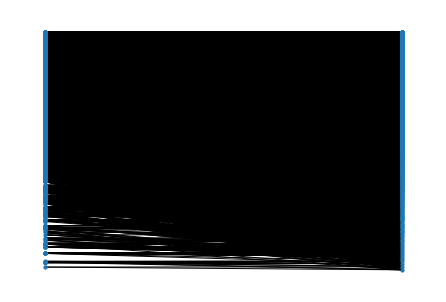

In [17]:
# Book_Customer
B = nx.Graph()
B.add_nodes_from(df_sub['Book_id'], bipartite=0)
B.add_nodes_from(df_sub['Customer_id'], bipartite=1)
B.add_edges_from([(row['Customer_id'], row['Book_id']) for idx, row in df_sub.iterrows()])

pos = {node:[0, i] for i,node in enumerate(df_sub['Customer_id'])}
pos.update({node:[1, i] for i,node in enumerate(df_sub['Book_id'])})
nx.draw(B, pos, with_labels=False,node_size=10)

bottom_nodes, top_nodes = bipartite.sets(B)

In [18]:
nx.info(B)

C:\Users\Liam\AppData\Local\Temp\ipykernel_24508\770005836.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(B)


'Graph with 3468 nodes and 14299 edges'

In [19]:
bipartite.clustering(B)

{'0439064872': 0.012041641341373753,
 '0439136350': 0.012112475990947011,
 '0399144463': 0.012825063735768171,
 '0970565100': 0.013012571869146294,
 '0375400117': 0.013183321169900194,
 '1410400441': 0.021483724184183102,
 '0553713108': 0.0214837241841831,
 '0399148701': 0.0214837241841831,
 '0739302213': 0.01822600673864737,
 '0452282152': 0.01636412963987162,
 '0743504739': 0.015518337517982114,
 '0375415823': 0.017937726862986312,
 '0375430695': 0.0179377268629863,
 '044023722X': 0.016901621327722948,
 '0553528912': 0.020858630210252645,
 '0312421273': 0.01618550564242515,
 '1575111136': 0.018659630980129616,
 '0694524646': 0.02286174845264297,
 '0380973650': 0.017079632955610324,
 '0842354204': 0.017596039787051664,
 '0694525332': 0.01862224381518631,
 '0060512806': 0.02069080353259925,
 '0380973464': 0.02069080353259925,
 '0684833395': 0.018093241554095404,
 '0743417682': 0.021513404615146486,
 '0345413350': 0.017959084898798636,
 '0446605484': 0.02536495051227427,
 '0316316962': 

In [20]:
bipartite.average_clustering(B)

0.11240934068067222

In [21]:
list(nx.algorithms.community.kclique.k_clique_communities(B, 3))

[]

In [22]:
list(nx.algorithms.community.kclique.k_clique_communities(B, 4))

[]

In [23]:
list(nx.algorithms.community.kclique.k_clique_communities(B, 5))

[]

### Product Network

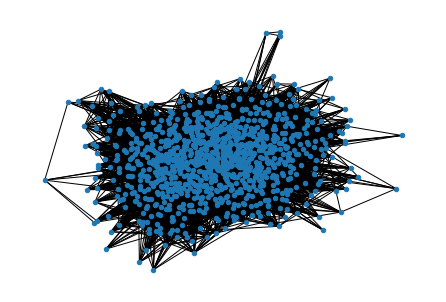

In [24]:
from networkx.algorithms import bipartite

## book_book
B1 =  bipartite.weighted_projected_graph(B, bottom_nodes)
nx.draw(B1, with_labels=False, node_size=20)

In [25]:
B1_degree=pd.Series(nx.degree_centrality(B1))
B1_betweenness=pd.Series(nx.betweenness_centrality(B1))
B1_closeness=pd.Series(nx.closeness_centrality(B1))
nx.density(B1)

0.08725748269474505

In [26]:
Book_Book_matrix=pd.DataFrame([pd.Series([a for (a,b,c) in B1.edges(data=True)]),pd.Series([b for (a,b,c) in B1.edges(data=True)]),pd.Series([c['weight'] for (a,b,c) in B1.edges(data=True)])]).T
Book_Book_matrix.columns=['Book_i','Book_j','#copurchased']
Book_Book_matrix.head()
print(Book_Book_matrix)

           Book_i      Book_j #copurchased
0      0380973545  0385488440            1
1      0380973545  0465041213            1
2      0380973545  0802139396            1
3      0380973545  1570429723            1
4      0380973545  089845865X            1
...           ...         ...          ...
48325  0380807203  0399149392            1
48326  0679745645  0399149392            1
48327  0679745645  0679455612            1
48328  0399149392  0679455612            1
48329  0140434267  0679455612            3

[48330 rows x 3 columns]


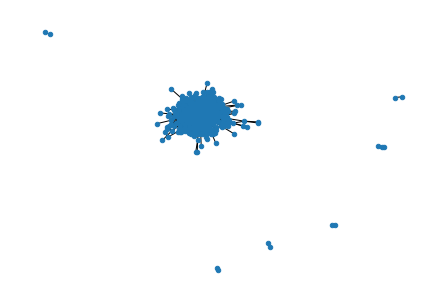

<Figure size 1440x720 with 0 Axes>

In [27]:
Book_Book_matrix2 =Book_Book_matrix[Book_Book_matrix['#copurchased'] > Book_Book_matrix['#copurchased'].mean()]
B1_2=nx.from_pandas_edgelist(Book_Book_matrix2, 'Book_i', 'Book_j', '#copurchased')
B1_2=B1_2.to_undirected()
nx.draw(B1_2, pos=nx.spring_layout(B1_2),node_size=20)
plt.figure(figsize=(20,10))
plt.show()

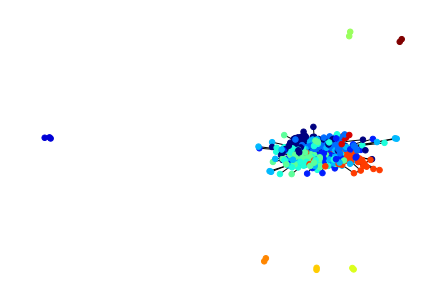

<Figure size 1440x720 with 0 Axes>

In [28]:
import community
Book_Book_matrix2 =Book_Book_matrix[Book_Book_matrix['#copurchased'] > Book_Book_matrix['#copurchased'].mean()]
B1_2=nx.from_pandas_edgelist(Book_Book_matrix2, 'Book_i', 'Book_j', '#copurchased')
B1_2=B1_2.to_undirected()
#nx.draw(B1_2, pos=nx.spring_layout(B1_2),node_size=20)

part = community.best_partition(B1_2)
values = [part.get(node) for node in B1_2.nodes()]
nx.draw_spring(B1_2, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.figure(figsize=(20,10))
plt.show()

In [29]:
from community import community_louvain

p = community_louvain.best_partition(B1_2)

In [30]:
df = pd.DataFrame(columns=['book_id','cluster_num'])
i=0
for k, v in p.items():
    df.loc[i] = [k,v]
    i = i + 1

In [31]:
df['cluster_num'].value_counts()

9     197
12    182
0     163
7     146
2     114
5      63
10     63
8      17
11      7
14      3
13      2
1       2
3       2
4       2
6       2
Name: cluster_num, dtype: int64

### Recommendation

In [32]:
import pandas as pd

df_amazon=pd.read_csv('amazon.csv')
df_amazon=df_amazon.set_index('ASIN')
df_sub['Book_id_l']=df_sub['Book_id'].map(lambda x:[x])
customer_book=df_sub.groupby('Customer_id')['Book_id_l'].sum()
get_title=df_amazon['title']

B1_path=dict(nx.all_pairs_dijkstra_path(B1))
B1_length=dict(nx.all_pairs_dijkstra_path_length(B1))

In [33]:
def recommend(customer_id):
    book_list=customer_book[customer_id]
    rec_list=[]
    degree_list=[]
    betweenness_list=[]
    closeness_list=[]
    for book_id in book_list:
        i=0
        r=pd.Series(B1_length[book_id]).sort_values().index
        while r[i] in book_list:
            i+=1
        r1=r[i]   
        rec_list.append(r1)
        degree_list.append(B1_degree[r1])
        betweenness_list.append(B1_betweenness[r1])
        closeness_list.append(B1_closeness[r1])
    df=pd.DataFrame([rec_list,degree_list,betweenness_list,closeness_list]).T
    df.columns=['rec_id','degree','betweenness','closeness']
    df_rec_count=df['rec_id'].value_counts()
    df['count']=df['rec_id'].map(lambda s:df_rec_count[s])
    df=df.drop_duplicates()
    df['score']=0.5*df['count']+0.5*(df['degree']+df['betweenness']+df['closeness'])
    df=df.sort_values(by='score',ascending=False)
    if len(df)<6:
        return [get_title[x] for x in df['rec_id'].values]
    else:
        return [get_title[x] for x in df.iloc[:5]['rec_id'].values]

In [34]:
recommend('10KKJMBY5L7TK')

["It's Not About the Bike: My Journey Back to Life",
 'Maxnotes Frankenstein (MAXnotes)',
 'The Two Towers (Lord of the Rings (Paperback))',
 'The Wide Window (A Series of Unfortunate Events, Book 3)',
 "Getting Everything You Can Out of All You'Ve Got"]

In [35]:
[get_title[x] for x in customer_book['10KKJMBY5L7TK']]

['Professor and The Madman, The : Unabridged',
 'How to Win Friends & Influence People',
 'How the Irish Saved Civilization (Hinges of History)',
 'The First World War',
 'Faith of the Fallen (Sword of Truth, Book 6)',
 'Lord of Chaos (The Wheel of Time, Book 6)',
 'Stone of Tears (Sword of Truth, Book 2)',
 "Foundation's Edge (Foundation Novels (Paperback))"]

### Customer Network

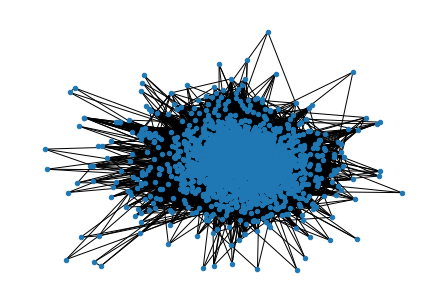

In [36]:
# customer_customer
B2 = bipartite.weighted_projected_graph(B, top_nodes)
nx.draw(B2, with_labels=False,node_size=20)

In [37]:
Customer_Customer_matrix=pd.DataFrame([pd.Series([a for (a,b,c) in B2.edges(data=True)]),pd.Series([b for (a,b,c) in B2.edges(data=True)]),pd.Series([c['weight'] for (a,b,c) in B2.edges(data=True)])]).T
Customer_Customer_matrix.columns=['Customer_i','Customer_j','#copurchased']
Customer_Customer_matrix.head()
print(Customer_Customer_matrix)

           Customer_i     Customer_j #copurchased
0       2JPGNKUBZB29V  22LX6529JJ166            1
1       2JPGNKUBZB29V  3CFT5LHFCB46K            1
2       2JPGNKUBZB29V  3MQXFVZ9DCE8M            2
3       2JPGNKUBZB29V  3QVAKVRAH657N            3
4       2JPGNKUBZB29V  14CM5XTMI0UXE            2
...               ...            ...          ...
200926  2FQWV725FGE8S  12MZKD80BQI2K            1
200927  2I32660RVI39G  36RVX6XDQIAAX            1
200928  34974VMNZKRAT  12MZKD80BQI2K            1
200929  3L1WSK1I3W4JU  3GT2VY34AXBOJ            2
200930  3GT2VY34AXBOJ  2RELWKFCZRB8G            1

[200931 rows x 3 columns]


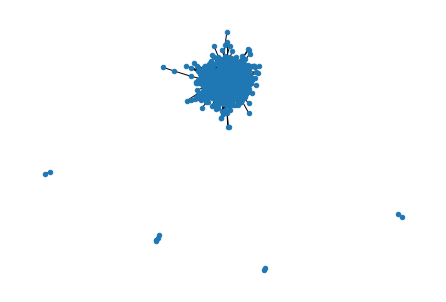

<Figure size 1440x720 with 0 Axes>

In [38]:
Customer_Customer_matrix2 =Customer_Customer_matrix[Customer_Customer_matrix['#copurchased'] > Customer_Customer_matrix['#copurchased'].mean()]
C1_2=nx.from_pandas_edgelist(Customer_Customer_matrix2, 'Customer_i', 'Customer_j', '#copurchased')
C1_2=C1_2.to_undirected()
nx.draw(C1_2, pos=nx.spring_layout(C1_2),node_size=20)
plt.figure(figsize=(20,10))
plt.show()

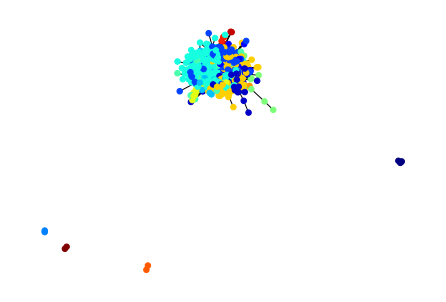

<Figure size 1440x720 with 0 Axes>

In [39]:
Customer_Customer_matrix2 =Customer_Customer_matrix[Customer_Customer_matrix['#copurchased'] > Customer_Customer_matrix['#copurchased'].mean()]
C1_2=nx.from_pandas_edgelist(Customer_Customer_matrix2, 'Customer_i', 'Customer_j', '#copurchased')
C1_2=C1_2.to_undirected()

part2 = community.best_partition(C1_2)
values2 = [part2.get(node) for node in C1_2.nodes()]
nx.draw_spring(C1_2, cmap = plt.get_cmap('jet'), node_color = values2, node_size=30, with_labels=False)
plt.figure(figsize=(20,10))
plt.show()

In [40]:
from community import community_louvain

p2 = community_louvain.best_partition(C1_2)
print(p2)

{'2JPGNKUBZB29V': 0, '3MQXFVZ9DCE8M': 0, '3QVAKVRAH657N': 0, '14CM5XTMI0UXE': 0, '3KLA83TB7PY5R': 0, '30OHJRZGGAEBN': 0, '2CVVCODXDVJO6': 0, '2T6RWGHT3DIDH': 1, '33FA68V0NCM5E': 0, '2SB5Q3JFV72NV': 0, '38F5EWGF8SCB0': 0, '1KXONMEYYD844': 0, '3NG3IWQSNNMHD': 0, '1E7KNNJSENIO2': 1, '2O1FLF439GX3P': 0, '1796BFN7L774T': 1, '1AAND6JLJGCV2': 0, '1P8CHG38LLE0H': 0, '30ONBQ70SMRAQ': 0, '3P062EHS66OCE': 0, '1R6M05D5C2GD7': 0, '3VOF1R6F2SBDY': 0, '3MJMFLUR7KTO1': 0, '1JLEHQDIBJM2Z': 0, '1K1JW1C5CUSUZ': 0, '1PNE9GR9XCUST': 0, '18PCOAE02O3SC': 0, '17FLA8HQOFVIG': 1, '1UTGHJD17V3LQ': 0, '30QQPDAPOCO3T': 0, '3IKBHODOTYYHM': 0, '2DRWZHFWO174O': 0, '10R1WAP6HFFEP': 0, '1XTLPXADYVJ68': 2, '1BJLZ8UNAZX2D': 0, '1JFQ6FNTBQ2ZH': 0, '2Y2ZMVBOH4XVW': 0, '11RU07SQDXVLP': 0, '1D2C0WDCSHUWZ': 3, '1J3T31N142ORD': 3, '2XZJXTYTJ7J79': 3, '13EUSV15UDAUG': 0, '1XNXHTPQRACRO': 3, '3Q80Q6YFP5W6Q': 4, '1JTG5X4VHJV27': 0, '1E2EI93MJW6QK': 3, '395QKQZ15GP4F': 3, '2IZQPM1AVVOT3': 3, '17IW44FV0HUTY': 0, '1H72DULSEGDX7': 3,

In [41]:
df2 = pd.DataFrame(columns=['customer_id','cluster_num'])
i=0
for k, v in p2.items():
    df2.loc[i] = [k,v]
    i = i + 1

In [42]:
df2['cluster_num'].value_counts()

6     735
0     349
3     264
1     237
5     201
2     118
4      54
10     53
9      34
12      8
11      7
8       5
15      4
13      3
14      2
16      2
7       2
Name: cluster_num, dtype: int64

In [43]:
print(df2['cluster_num'])

0       0
1       0
2       0
3       0
4       0
       ..
2073    3
2074    3
2075    0
2076    6
2077    1
Name: cluster_num, Length: 2078, dtype: int64
